<a href="https://colab.research.google.com/github/AhmedGlili/1_digits_recognition-Using-CNN/blob/main/NumberClassificationUsingCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(x_train,y_train),(x_test,y_test)=datasets.mnist.load_data()

In [ ]:
len(x_train)
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
len(x_test)

10000

In [ ]:
x_train.shape

(60000, 28, 28)

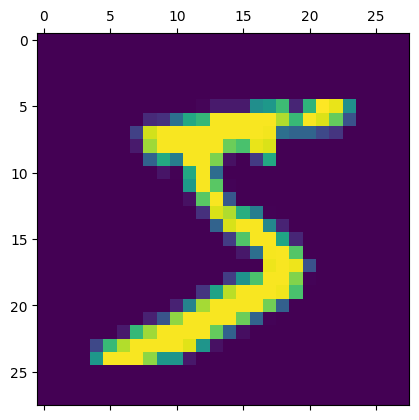

In [ ]:
plt.matshow(x_train[0])

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
x_train=x_train/255

In [ ]:

x_train.shape

(60000, 28, 28)

In [ ]:
cnn = models.Sequential([
    # CNN
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.1387 - accuracy: 0.9587
Epoch 2/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0457 - accuracy: 0.9862
Epoch 3/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0338 - accuracy: 0.9892
Epoch 4/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0249 - accuracy: 0.9919
Epoch 5/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0193 - accuracy: 0.9938
Epoch 6/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0142 - accuracy: 0.9953
Epoch 7/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0117 - accuracy: 0.9961
Epoch 8/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0103 - accuracy: 0.9966
Epoch 9/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0081 - accuracy: 0.9972
Epoch 10/10
1875/1875 [==============================] - 57s 31m

In [ ]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 11.8662 - accuracy: 0.9892


[11.866199493408203, 0.9891999959945679]

In [ ]:
y_predicted=cnn.predict(x_test)
y_predicted[0]

313/313 [==============================] - 3s 9ms/step


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.99999994, 0.        , 0.        ],
      dtype=float32)

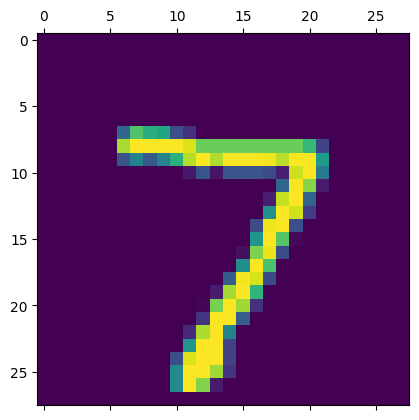

In [ ]:
plt.matshow(x_test[0])

In [ ]:
np.argmax(y_predicted[0])

7

In [ ]:
y_predicted_labels=[np.argmax(i)for i in y_predicted]

In [ ]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    0,    0,    0,    1,    0,    1,    0,    2,    3],
       [   0, 1131,    0,    2,    0,    0,    0,    0,    1,    1],
       [   2,    0, 1011,    4,    1,    0,    0,   10,    4,    0],
       [   0,    0,    1,  999,    0,    7,    0,    0,    3,    0],
       [   0,    0,    0,    0,  975,    0,    0,    0,    2,    5],
       [   1,    0,    0,    3,    0,  883,    1,    0,    3,    1],
       [   1,    1,    1,    0,    1,    4,  945,    0,    5,    0],
       [   0,    1,    0,    2,    2,    1,    0, 1017,    2,    3],
       [   2,    0,    1,    0,    1,    0,    0,    1,  968,    1],
       [   0,    1,    0,    0,    7,    4,    0,    1,    6,  990]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

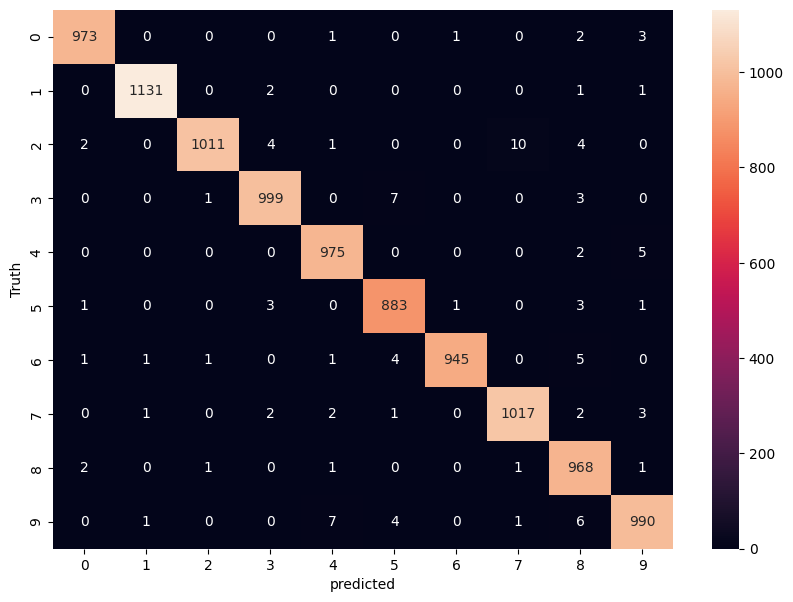

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')